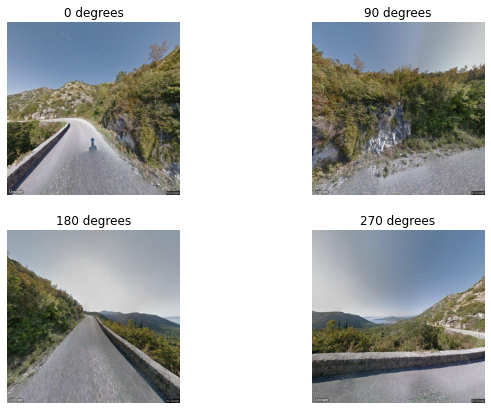

In [6]:
import csv
import cv2
from matplotlib import pyplot as plt

#open csv file and choose random item row from it
file = open("dataset/data.csv")
csvreader = csv.reader(file)
header = next(csvreader)

rows = []
for row in csvreader:
    rows.append(row)
    
from random import randrange

pick = rows.__getitem__(randrange(16000))

#load random picture from dataset
fig = plt.figure(figsize=(10, 7))

for i in range(4):
    filename = 'dataset/data/' + pick[0] + '/' + str(i*90) + '.jpg'
    im=cv2.imread(filename)
    fig.add_subplot(2, 2, i+1)
    plt.imshow(cv2.cvtColor(im, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title(str(i*90) + " degrees")

In [ ]:
import numpy as np

# reading the image
img = cv2.imread('y€42.139,46.582;x€13.184,19.512.png')

np.shape(img)

x1 = 0.0
x2 = float(np.shape(img)[0])
y1 = float(np.shape(img)[1])
y2 = 0.0

a1 = 13.184
a2 = 19.512
b1 = 42.139
b2 = 46.582

#functions to convert coordinates from geographical coordinates to dimensions of pictures
def _f(x):
    return round((a2-a1)*(x-x1)/(x2-x1)+a1, 2)

def _g(y):
    return round((b2-b1)*(y-y1)/(y2-y1)+b1, 2)

def f_inv(x):
    return int((x2-x1)*(x-a1)/(a2-a1)+x1)
    
def g_inv(y):
    return int((y2-y1)*(y-b1)/(b2-b1)+y1)

# function to display the coordinates of
# of the points clicked on the image
def click_event(event, x, y, flags, params):

    # checking for left mouse clicks
    if event == cv2.EVENT_LBUTTONDOWN:
        global img
        # displaying the coordinates on terminal
        print(_f(x), ' ',_g(y))

        # displaying the circle of OUR GUESS
        font = cv2.FONT_HERSHEY_SIMPLEX
        #cv2.putText(img, str(_f(x)) + ',' +
        #            str(_g(y)), (x,y), font,
        #            1, (255, 0, 0), 2)
        
        img = cv2.circle(img, (x,y), 
                           radius=7, color=(255, 0, 0), thickness=-1)
        
        cv2.imshow('image', img)

    # checking for right mouse clicks
    if event==cv2.EVENT_RBUTTONDOWN:

        # displaying the coordinates on terminal
        print(str(round(float(pick[2]), 2)), str(round(float(pick[1]),2)))

        # displaying the circle of TRUE GUESS
        font = cv2.FONT_HERSHEY_SIMPLEX
        
        img = cv2.circle(img, (f_inv(float(pick[2])), g_inv(float(pick[1]))), 
                           radius=7, color=(0, 0, 255), thickness=-1)
        
        cv2.imshow('image', img)
        

# displaying the image
cv2.imshow('image', img)

# setting mouse handler for the image
# and calling the click_event() function
cv2.setMouseCallback('image', click_event)

# wait for a key to be pressed to exit
cv2.waitKey(0)

# close the window
cv2.destroyAllWindows()

15.65   43.85
17.9 42.79
